In [348]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
df_write = pd.read_csv('time_write_value_cycles_1000_delay_0.csv')
df_method = pd.read_csv('time_method_cycles_1000_delay_0.csv')
df_sub = pd.read_csv('time_subscription_cycles_1000_period_10_queuesize_1.csv')

In [328]:
def gauß(x, mu, std, a):
    return (a/np.sqrt(2*np.pi*std**2))*np.exp(-((x-mu)**2)/2*std**2)

def log_norm(x, m, s, a):
    return (a/np.sqrt(2*np.pi)*s*x)*np.exp(-((np.log(x)-m**2)/2*s**2))

def rayleigh(x, mu, std):
    return (x/std**2)*np.exp(-(x-mu**2)/2*std**2)


def draw_quantile(data, quantile, linestyles=None, ax=None):
    if linestyles:
        for idx,q in enumerate(quantile):
            plt.axvline(x=np.quantile(data, q), color='k', label=f'{q*100}%', linestyle=linestyles[idx]) 
    else:
        for q in quantile:
            plt.axvline(x=np.quantile(data, q), color='k', label=f'{q*100}%')
            
def plot_cdf(data, end=1, num=10, plot=True):
    steps = np.linspace(0, end, num)
    data_mat, steps_mat = np.meshgrid(data, steps)
    cdf = np.array(list(map(np.quantile, data_mat, steps)))
    if plot: plt.plot(cdf, steps*100)
    return cdf, steps

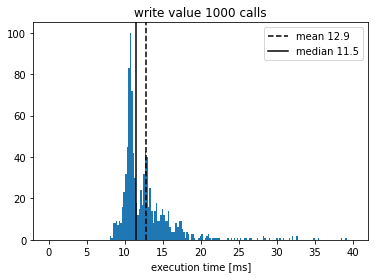

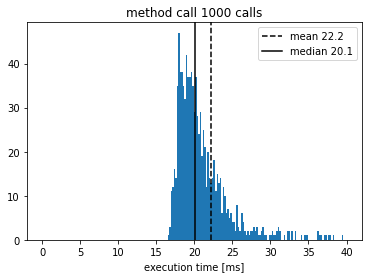

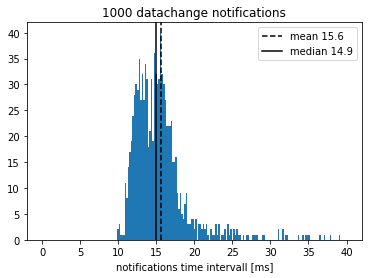

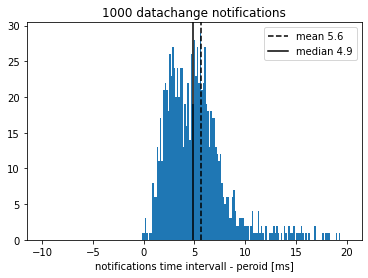

In [4]:
bins = np.linspace(0,40, 200)

plot_hist(df_write['write_value']*10**(-6), bins, title=f'write value {len(df_write)} calls')
plt.xlabel('execution time [ms]')
plt.show()

plot_hist(df_method['method_call']*10**(-6), bins, title=f'method call {len(df_method)} calls')
plt.xlabel('execution time [ms]')
plt.show()

plot_hist(df_sub['datachange_notifications']*10**(-6), bins, title=f'{len(df_method)} datachange notifications')
plt.xlabel('notifications time intervall [ms]')
plt.show()

bins = np.linspace(-10,20, 200)
plot_hist(df_sub['datachange_notifications']*10**(-6)-df_sub['period'], bins,
          title=f'{len(df_method)} datachange notifications')
plt.xlabel('notifications time intervall - peroid [ms]')
plt.show()

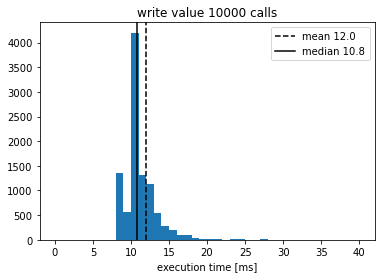

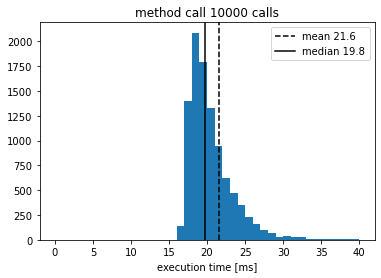

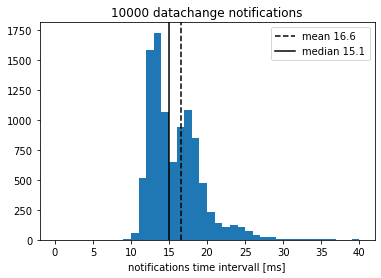

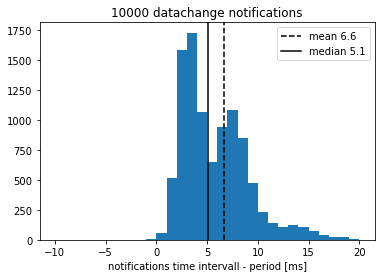

In [5]:
df_write = pd.read_csv('time_write_value_cycles_10000_delay_0.csv')
df_method = pd.read_csv('time_method_cycles_10000_delay_0.csv')
df_sub = pd.read_csv('time_subscription_cycles_10000_period_10_queuesize_1.csv')

bins = np.linspace(0,40, 41)

plot_hist(df_write['write_value']*10**(-6), bins, title=f'write value {len(df_write)} calls')
plt.xlabel('execution time [ms]')
plt.show()

plot_hist(df_method['method_call']*10**(-6), bins, title=f'method call {len(df_method)} calls')
plt.xlabel('execution time [ms]')
plt.show()

plot_hist(df_sub['datachange_notifications']*10**(-6), bins, title=f'{len(df_method)} datachange notifications')
plt.xlabel('notifications time intervall [ms]')
plt.show()

bins = np.linspace(-10,20, 31)
plot_hist(df_sub['datachange_notifications']*10**(-6)-df_sub['period'], bins,
          title=f'{len(df_method)} datachange notifications')
plt.xlabel('notifications time intervall - period [ms]')
plt.show()

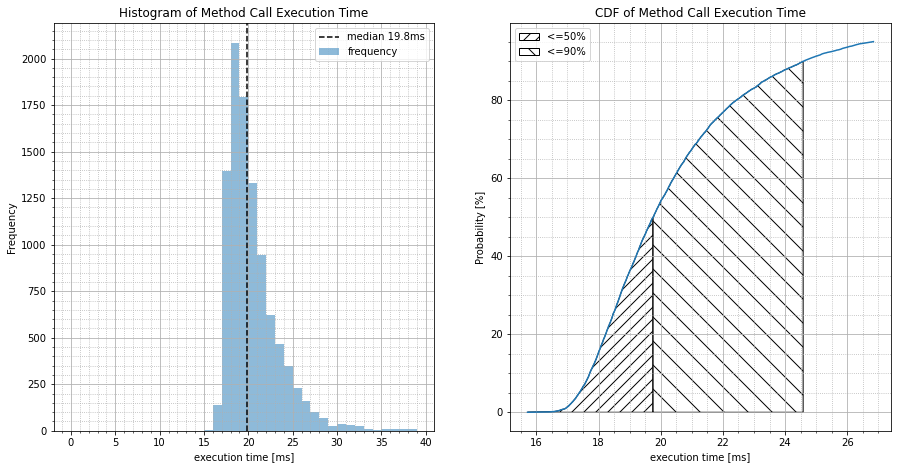

In [365]:
method_call_ms = df_method['method_call']*10**(-6) # [ms]
median = round(method_call_ms.median(), 1) # median
bins = np.arange(0, 40, 1)

fig, ax = plt.subplots(1, 2, figsize=(15,7.5))

ax[0].hist(method_call_ms, bins=bins, alpha=0.5, label='frequency') # histogram
ax[0].axvline(x=median, color='k', linestyle='--', label=f'median {median}ms') # draw median
ax[0].legend()
ax[0].set_title('Histogram of Method Call Execution Time')
ax[0].set_xlabel('execution time [ms]')
ax[0].set_ylabel('Frequency')
# set grid ticks
ax[0].yaxis.set_major_locator(MultipleLocator(250))
ax[0].xaxis.set_major_locator(MultipleLocator(5))
# minors relative to majors
ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(5))
ax[0].grid(which='major')
ax[0].grid(which='minor', linestyle=':')


cdf, steps = plot_cdf(method_call_ms, end=0.95, num=1000, plot=True) # compute CDF
sub_window = cdf<=np.quantile(method_call_ms,0.5)
ax[1].fill_between(cdf[sub_window], steps[sub_window]*100,
                 color='w', hatch='//', edgecolor="k", label='<=50%')
sub_window = (cdf>np.quantile(method_call_ms,0.5)) & (cdf<=np.quantile(method_call_ms,0.9))
ax[1].fill_between(cdf[sub_window], steps[sub_window]*100,
                 color='w', hatch='\\', edgecolor="k", label='<=90%')
ax[1].legend()
ax[1].set_title('CDF of Method Call Execution Time')
ax[1].set_xlabel('execution time [ms]')
ax[1].set_ylabel('Probability [%]')
# set grid ticks
ax[1].yaxis.set_major_locator(MultipleLocator(20))
ax[1].xaxis.set_major_locator(MultipleLocator(2))
# minors relative to majors
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].grid(which='major')
ax[1].grid(which='minor', linestyle=':')
plt.show()

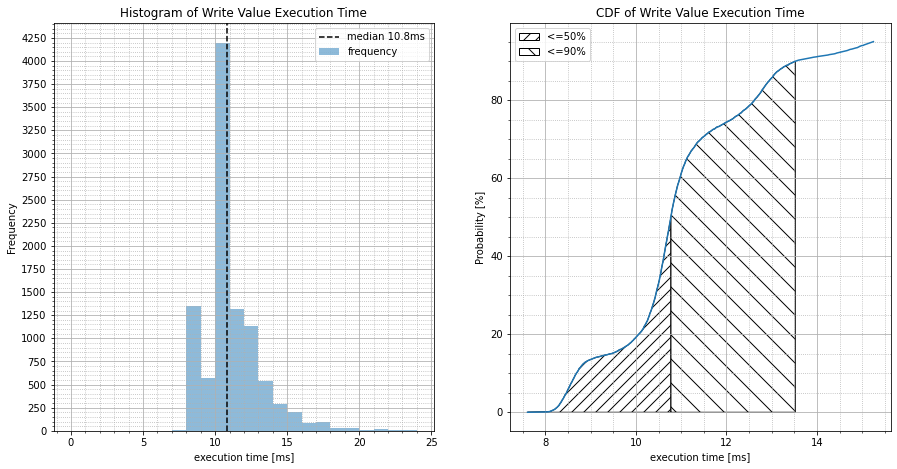

In [367]:
write_val_ms = df_write['write_value']*10**(-6) # [ms]
median = round(write_val_ms.median(), 1) # median
bins = np.arange(0, 25, 1)

fig, ax = plt.subplots(1, 2, figsize=(15,7.5))

ax[0].hist(write_val_ms, bins=bins, alpha=0.5, label='frequency') # histogram
ax[0].axvline(x=median, color='k', linestyle='--', label=f'median {median}ms') # draw median
ax[0].legend()
ax[0].set_title('Histogram of Write Value Execution Time')
ax[0].set_xlabel('execution time [ms]')
ax[0].set_ylabel('Frequency')
# set grid ticks
ax[0].yaxis.set_major_locator(MultipleLocator(250))
ax[0].xaxis.set_major_locator(MultipleLocator(5))
# minors relative to majors
ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(5))
ax[0].grid(which='major')
ax[0].grid(which='minor', linestyle=':')


cdf, steps = plot_cdf(write_val_ms, end=0.95, num=1000, plot=True) # compute CDF
sub_window = cdf<=np.quantile(write_val_ms,0.5)
ax[1].fill_between(cdf[sub_window], steps[sub_window]*100,
                 color='w', hatch='//', edgecolor="k", label='<=50%')
sub_window = (cdf>np.quantile(write_val_ms,0.5)) & (cdf<=np.quantile(write_val_ms,0.9))
ax[1].fill_between(cdf[sub_window], steps[sub_window]*100,
                 color='w', hatch='\\', edgecolor="k", label='<=90%')
ax[1].legend()
ax[1].set_title('CDF of Write Value Execution Time')
ax[1].set_xlabel('execution time [ms]')
ax[1].set_ylabel('Probability [%]')
# set grid ticks
ax[1].yaxis.set_major_locator(MultipleLocator(20))
ax[1].xaxis.set_major_locator(MultipleLocator(2))
# minors relative to majors
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].grid(which='major')
ax[1].grid(which='minor', linestyle=':')
plt.show()

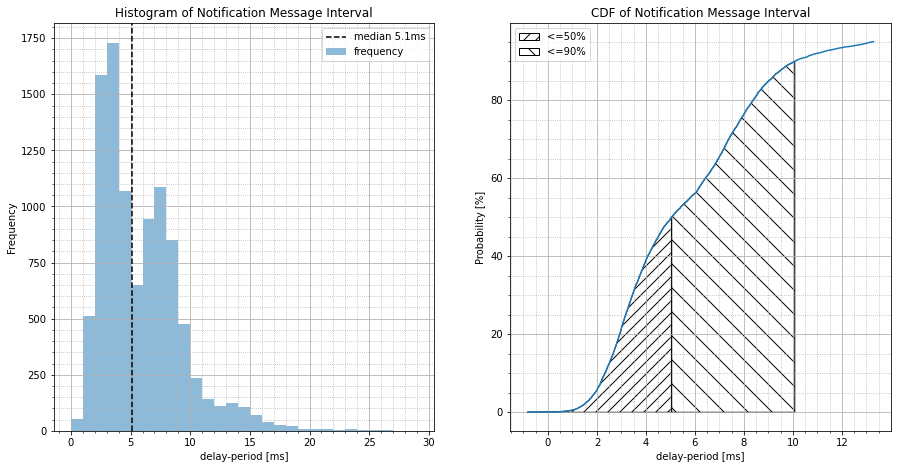

In [373]:
notification_ms = df_sub['datachange_notifications']*10**(-6)-df_sub['period']# [ms]
median = round(notification_ms.median(), 1) # median
bins = np.arange(0, 30, 1)

fig, ax = plt.subplots(1, 2, figsize=(15,7.5))

ax[0].hist(notification_ms, bins=bins, alpha=0.5, label='frequency') # histogram
ax[0].axvline(x=median, color='k', linestyle='--', label=f'median {median}ms') # draw median
ax[0].legend()
ax[0].set_title('Histogram of Notification Message Interval')
ax[0].set_xlabel('delay-period [ms]')
ax[0].set_ylabel('Frequency')
# set grid ticks
ax[0].yaxis.set_major_locator(MultipleLocator(250))
ax[0].xaxis.set_major_locator(MultipleLocator(5))
# minors relative to majors
ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(5))
ax[0].grid(which='major')
ax[0].grid(which='minor', linestyle=':')


cdf, steps = plot_cdf(notification_ms, end=0.95, num=1000, plot=True) # compute CDF
sub_window = cdf<=np.quantile(notification_ms,0.5)
ax[1].fill_between(cdf[sub_window], steps[sub_window]*100,
                 color='w', hatch='//', edgecolor="k", label='<=50%')
sub_window = (cdf>np.quantile(notification_ms,0.5)) & (cdf<=np.quantile(notification_ms,0.9))
ax[1].fill_between(cdf[sub_window], steps[sub_window]*100,
                 color='w', hatch='\\', edgecolor="k", label='<=90%')
ax[1].legend()
ax[1].set_title('CDF of Notification Message Interval')
ax[1].set_xlabel('delay-period [ms]')
ax[1].set_ylabel('Probability [%]')
# set grid ticks
ax[1].yaxis.set_major_locator(MultipleLocator(20))
ax[1].xaxis.set_major_locator(MultipleLocator(2))
# minors relative to majors
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].grid(which='major')
ax[1].grid(which='minor', linestyle=':')
plt.show()